<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge: Modélisation</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

Désormais, nos variables sont propres, et peuvent être directement utilisées dans la modélisation. 
Si ce n'est pas le cas, nous remettons la pipeline à disposition


### Installation de l'environnement de travail

#### Installation des packages

In [1]:
from scripts.modelisation import prepare_data_for_ml,fitting_model,gridsearchcv_for_model,evaluation,get_coeff_for_model,verif_nb_colonnes
import sklearn
import pickle
from sklearn.model_selection import  train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
import xgboost  as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")


#### Importation des données

In [2]:
""" RAPPEL SUR LES VARIABLES SELECTIONNEES"""

col_selected=["g_quotite", "g_PCT_TEG_TAEG_CRI", "g_MOY_ANC_PROF_BRP", "g_MNT_TOT_ASSURANCE_CRI", "g_COUT_RACHAT_BRP", "g_BEST_APPORT_TX_BRP","TOP_NAT_FR_CRI","QUA_INT_MAX_BRP","QUA_INT_1_BRP",
        "IRPRO_USAGE_V12_MAX", "IRPAR_USAGE_V12_MAX","IND_PRIMO_ACCEDT_CRI","COD_TYPE_MARCHE_CRI","COD_SITU_LOGT_CRI", "COD_CPPOP_CRI","CODTYP_CRT_TRAVAIL_CRI" ]


In [3]:
""" IMPORTATION DES DONNEES"""
x_base_train = pd.read_csv('data/output/x_train.csv').drop(columns="Unnamed: 0")
df_test = pd.read_csv('data/output/x_test.csv').drop(columns="Unnamed: 0")
x_oot = pd.read_csv('data/output/x_oot.csv') .drop(columns="Unnamed: 0")


In [4]:
""" PROCESSING RAPIDE POUR ML (ONE HOT ENCODING)"""

x_base_train,y_base_train=prepare_data_for_ml(x_base_train,col_selected)
df_test,y_df_test=prepare_data_for_ml(df_test,col_selected)
x_oot,y_oot=prepare_data_for_ml(x_oot,col_selected)


In [5]:
""" VERIFICATION MEME FEATURES POUR ML"""
x_oot=verif_nb_colonnes(x_base_train,x_oot)
df_test=verif_nb_colonnes(x_base_train,df_test)


In [6]:
x_base_train

,g_quotite_grp_2,g_quotite_grp_3,g_quotite_grp_4,g_PCT_TEG_TAEG_CRI_grp_2,g_PCT_TEG_TAEG_CRI_grp_3,g_PCT_TEG_TAEG_CRI_grp_4,g_MOY_ANC_PROF_BRP_grp_2,g_MOY_ANC_PROF_BRP_grp_3,g_MOY_ANC_PROF_BRP_nan,g_MNT_TOT_ASSURANCE_CRI_grp_2,...,IRPAR_USAGE_V12_MAX_1,IRPAR_USAGE_V12_MAX_2,IND_PRIMO_ACCEDT_CRI_1,COD_TYPE_MARCHE_CRI_1,COD_SITU_LOGT_CRI_2,COD_SITU_LOGT_CRI_3,COD_CPPOP_CRI_1,COD_CPPOP_CRI_2,CODTYP_CRT_TRAVAIL_CRI_1,CODTYP_CRT_TRAVAIL_CRI_2
0,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68211,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
68212,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
68213,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
68214,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [7]:
""" VERIFICATION DU NOMBRE DE FEATURES"""
display(x_base_train.head(10))
print("Vérification du nombre de variables (35 colonnes):",x_base_train.shape)

,g_quotite_grp_2,g_quotite_grp_3,g_quotite_grp_4,g_PCT_TEG_TAEG_CRI_grp_2,g_PCT_TEG_TAEG_CRI_grp_3,g_PCT_TEG_TAEG_CRI_grp_4,g_MOY_ANC_PROF_BRP_grp_2,g_MOY_ANC_PROF_BRP_grp_3,g_MOY_ANC_PROF_BRP_nan,g_MNT_TOT_ASSURANCE_CRI_grp_2,...,IRPAR_USAGE_V12_MAX_1,IRPAR_USAGE_V12_MAX_2,IND_PRIMO_ACCEDT_CRI_1,COD_TYPE_MARCHE_CRI_1,COD_SITU_LOGT_CRI_2,COD_SITU_LOGT_CRI_3,COD_CPPOP_CRI_1,COD_CPPOP_CRI_2,CODTYP_CRT_TRAVAIL_CRI_1,CODTYP_CRT_TRAVAIL_CRI_2
0,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
8,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
9,0,1,0,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0


Vérification du nombre de variables (35 colonnes): (68216, 35)


In [8]:
""" SPLIT ECHANTILLON APPRENTISSAGE/TEST"""
x_train, x_test, y_train, y_test=train_test_split(x_base_train,y_base_train,stratify=y_base_train)

### Régression logistique

#### Entraînement et performance sur l'échantillon train/validation

In [ ]:
logistic_model=LogisticRegression()
grid_logistic = {'penalty' : ['elasticnet' ] ,
'C' : [0.01, 0.1 , 10] ,
'solver' :  ['saga'], 
'l1_ratio' : [ 0.01 , 0.1],
'class_weight' : [ {1 : class_} for class_ in [1,2,5]  ] }

""" GRIDSEARCH POUR LOGISTIQUE"""

params=gridsearchcv_for_model(logistic_model,x_train,y_train,grid_logistic,train_mod_with_best_params=False)
print("Best parameters:",params)


[Explication pourquoi on choisit pas les memes sagas...]

In [10]:
""" PARAMETRES FINALEMENT RETENUS:"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}
print("Paramètres retenus:",params_for_logistic)

Paramètres retenus: {'random_state': 42, 'fit_intercept': True, 'class_weight': '{1: 2}', 'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [11]:
""" MODELE FINAL"""
logistic_final=LogisticRegression(**params_for_logistic)
logistic_final=fitting_model(logistic_final,x_train,y_train)

In [12]:
""" Exportation du modèle et importation"""
#pickle.dump(logistic_final, open('artefacts/logistic_final.pkl', 'wb'))
#logistic_model= pickle.load(open('artefacts/logistic_final.pkl', 'rb'))

array([[50833,     0],
       [  329,     0]])

array([[16944,     0],
       [  110,     0]])

AUC TRAIN : 0.74
AUC TEST : 0.75


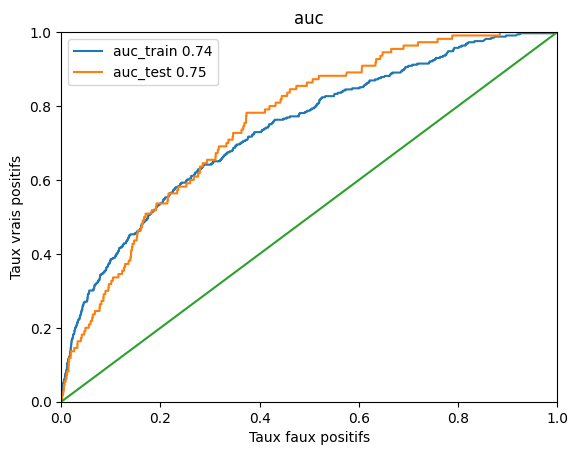

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [13]:

evaluation(logistic_final,x_train,x_test,y_train,y_test)

### Performance du modèle sur les autres échantillons: 

In [14]:
""" RAPPEL MODELE FINAL"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}
logistic_final=LogisticRegression(**params_for_logistic)
final_model_logistic=fitting_model(logistic_final,x_train,y_train)

In [15]:
print("Performance du modèle sur la base OOT")
y_oot_pred = final_model_logistic.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))

print("Performance du modèle sur la base test")
y_test_predict = final_model_logistic.predict_proba(df_test) 
y_test_predict = pd.DataFrame(y_test_predict).iloc[: , 1]
score_auc_test = sklearn.metrics.roc_auc_score(y_test, y_test_predict)
print('AUC base test :' ,score_auc_test.round(2))

Performance du modèle sur la base OOT
AUC base oot : 0.68
Performance du modèle sur la base test
AUC base test : 0.51


## Modélisation concurrente: XGBoost

### Sélection d'hyperparamètres

In [16]:
from collections import Counter
""" POIDS POUR CLASS WEIGHT """
counter = Counter(y_train)
estimate = counter[0] / counter[1] 
print('Estimate: %.3f' % estimate)

Estimate: 154.508


In [ ]:
""" GRIDSEARCH XGBOOST"""

boost=xgb.XGBClassifier(objective="binary:logistic")

param_grid_xgb = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [estimate],
    "subsample": [0 ,0.8],
    "colsample_bytree": [0.5],
    "n_jobs":[-1],
}


#param_grid_xgb_bis = {
#    "max_depth": [3, 4, 5, 7],
#    "learning_rate": [0.1, 0.01, 0.05],
#    "gamma": [0, 0.25, 1],
#    "reg_lambda": [0,0.5, 1, 10],
#    "scale_pos_weight": [estimate],
#    "subsample": [0 ,0.8],
#    "colsample_bytree": [0.5,0.7],
#    "n_jobs":[-1],
#    "min_child_weight":[1,10]    
#}


gridsearchcv_for_model(boost,x_base_train,y_base_train,param_grid_xgb,False)

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_jobs': -1,
 'reg_lambda': 10,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}

In [ ]:
""" HYPERPARAMETRES SELON LES GRIDSEARCH"""

params_for_xgb={'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}

other_version_xgb={'colsample_bytree':0.7,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_lambda': 10,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}   




### Modèle et performance

Modèle XGBoost 1


array([[35826, 15007],
       [  109,   220]])

array([[11942,  5002],
       [   41,    69]])

AUC TRAIN : 0.75
AUC TEST : 0.73
Modèle XGBoost 2: Ajout de paramètres supplémentaires dans le cv


array([[37552, 13281],
       [  108,   221]])

array([[12549,  4395],
       [   45,    65]])

AUC TRAIN : 0.77
AUC TEST : 0.73


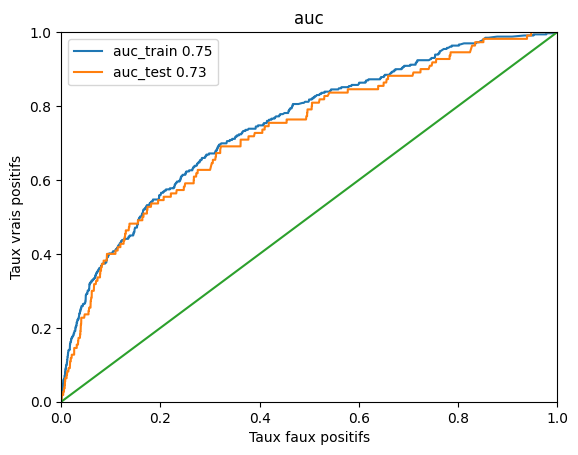

<Figure size 900x900 with 0 Axes>

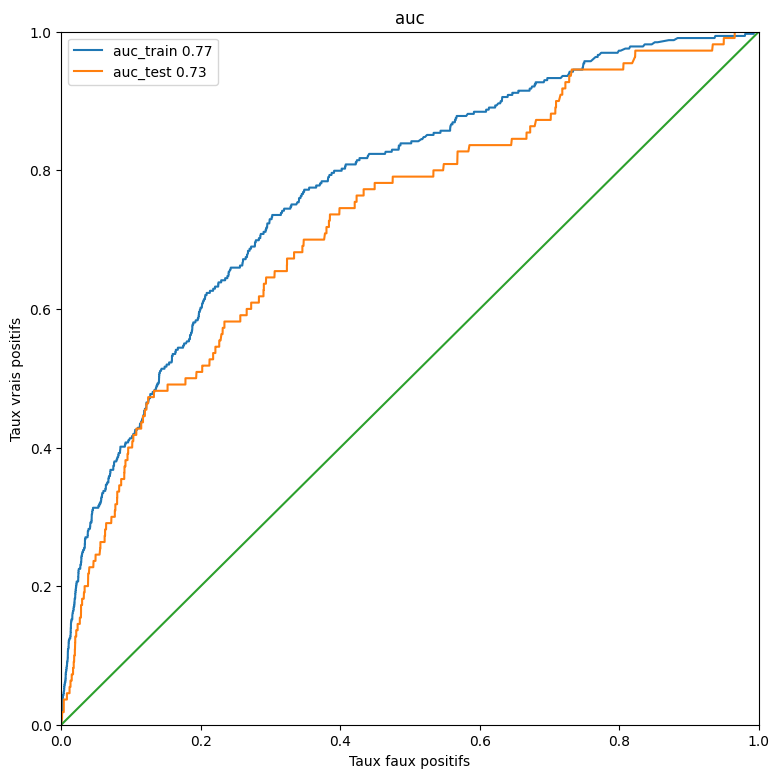

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [ ]:
print("Modèle XGBoost 1")
xgb_model=xgb.XGBClassifier(**params_for_xgb)
xgboost=fitting_model(xgb_model,x_train,y_train)
evaluation(xgboost, x_train,x_test,y_train,y_test)
print("Modèle XGBoost 2: Ajout de paramètres supplémentaires dans le cv")
xgb_model_2=xgb.XGBClassifier(**other_version_xgb)
xgb_model_2=fitting_model(xgb_model_2,x_train,y_train)
evaluation(xgb_model_2, x_train,x_test,y_train,y_test)


array([[37552, 13281],
       [  108,   221]])

array([[12549,  4395],
       [   45,    65]])

AUC TRAIN : 0.77
AUC TEST : 0.73


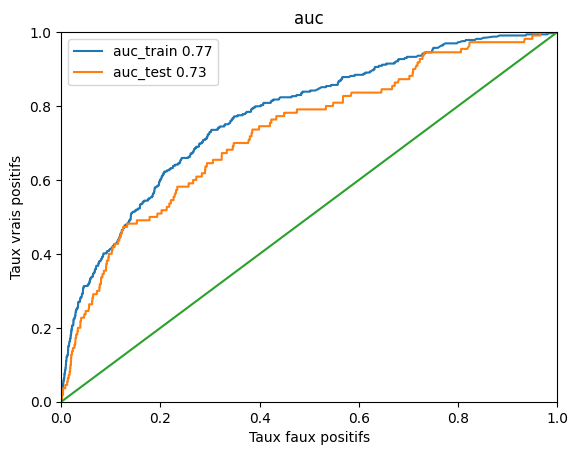

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [ ]:
""" Exportation du modèle et importation"""
#pickle.dump(xgboost, open('artefacts/xgboost.pkl', 'wb'))
# xgboost_model= pickle.load(open('artefacts/xgboost.pkl', 'rb'))


In [ ]:
print("Performance du modèle sur la base OOT")
y_oot_pred = xgb_model_2.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))



Performance du modèle sur la base OOT
AUC base oot : 0.68


Meilleure perforamance que le modèle de régression logisitique au sens de l'auc

### Interprétation du modèle

In [ ]:
xgb_model=xgb_model_2

In [ ]:
import shap

shap.initjs()
explain_xgb= shap.TreeExplainer(xgb_model)
shap_values = explain_xgb.shap_values(x_train)
shap.force_plot(explain_xgb.expected_value, shap_values[2, :], x_train.iloc[2, :])

In [ ]:
shap_values = explain_xgb.shap_values(x_train)
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)


In [ ]:
feature_importance

,col_name,feature_importance_vals
5,g_PCT_TEG_TAEG_CRI_grp_4,0.188049
26,IRPAR_USAGE_V12_MAX_2,0.160549
10,g_MNT_TOT_ASSURANCE_CRI_grp_3,0.143046
31,COD_CPPOP_CRI_1,0.096490
32,COD_CPPOP_CRI_2,0.095230
9,g_MNT_TOT_ASSURANCE_CRI_grp_2,0.080260
7,g_MOY_ANC_PROF_BRP_grp_3,0.071343
13,g_COUT_RACHAT_BRP_grp_3,0.065303
2,g_quotite_grp_4,0.059616
16,g_BEST_APPORT_TX_BRP_grp_4,0.053108


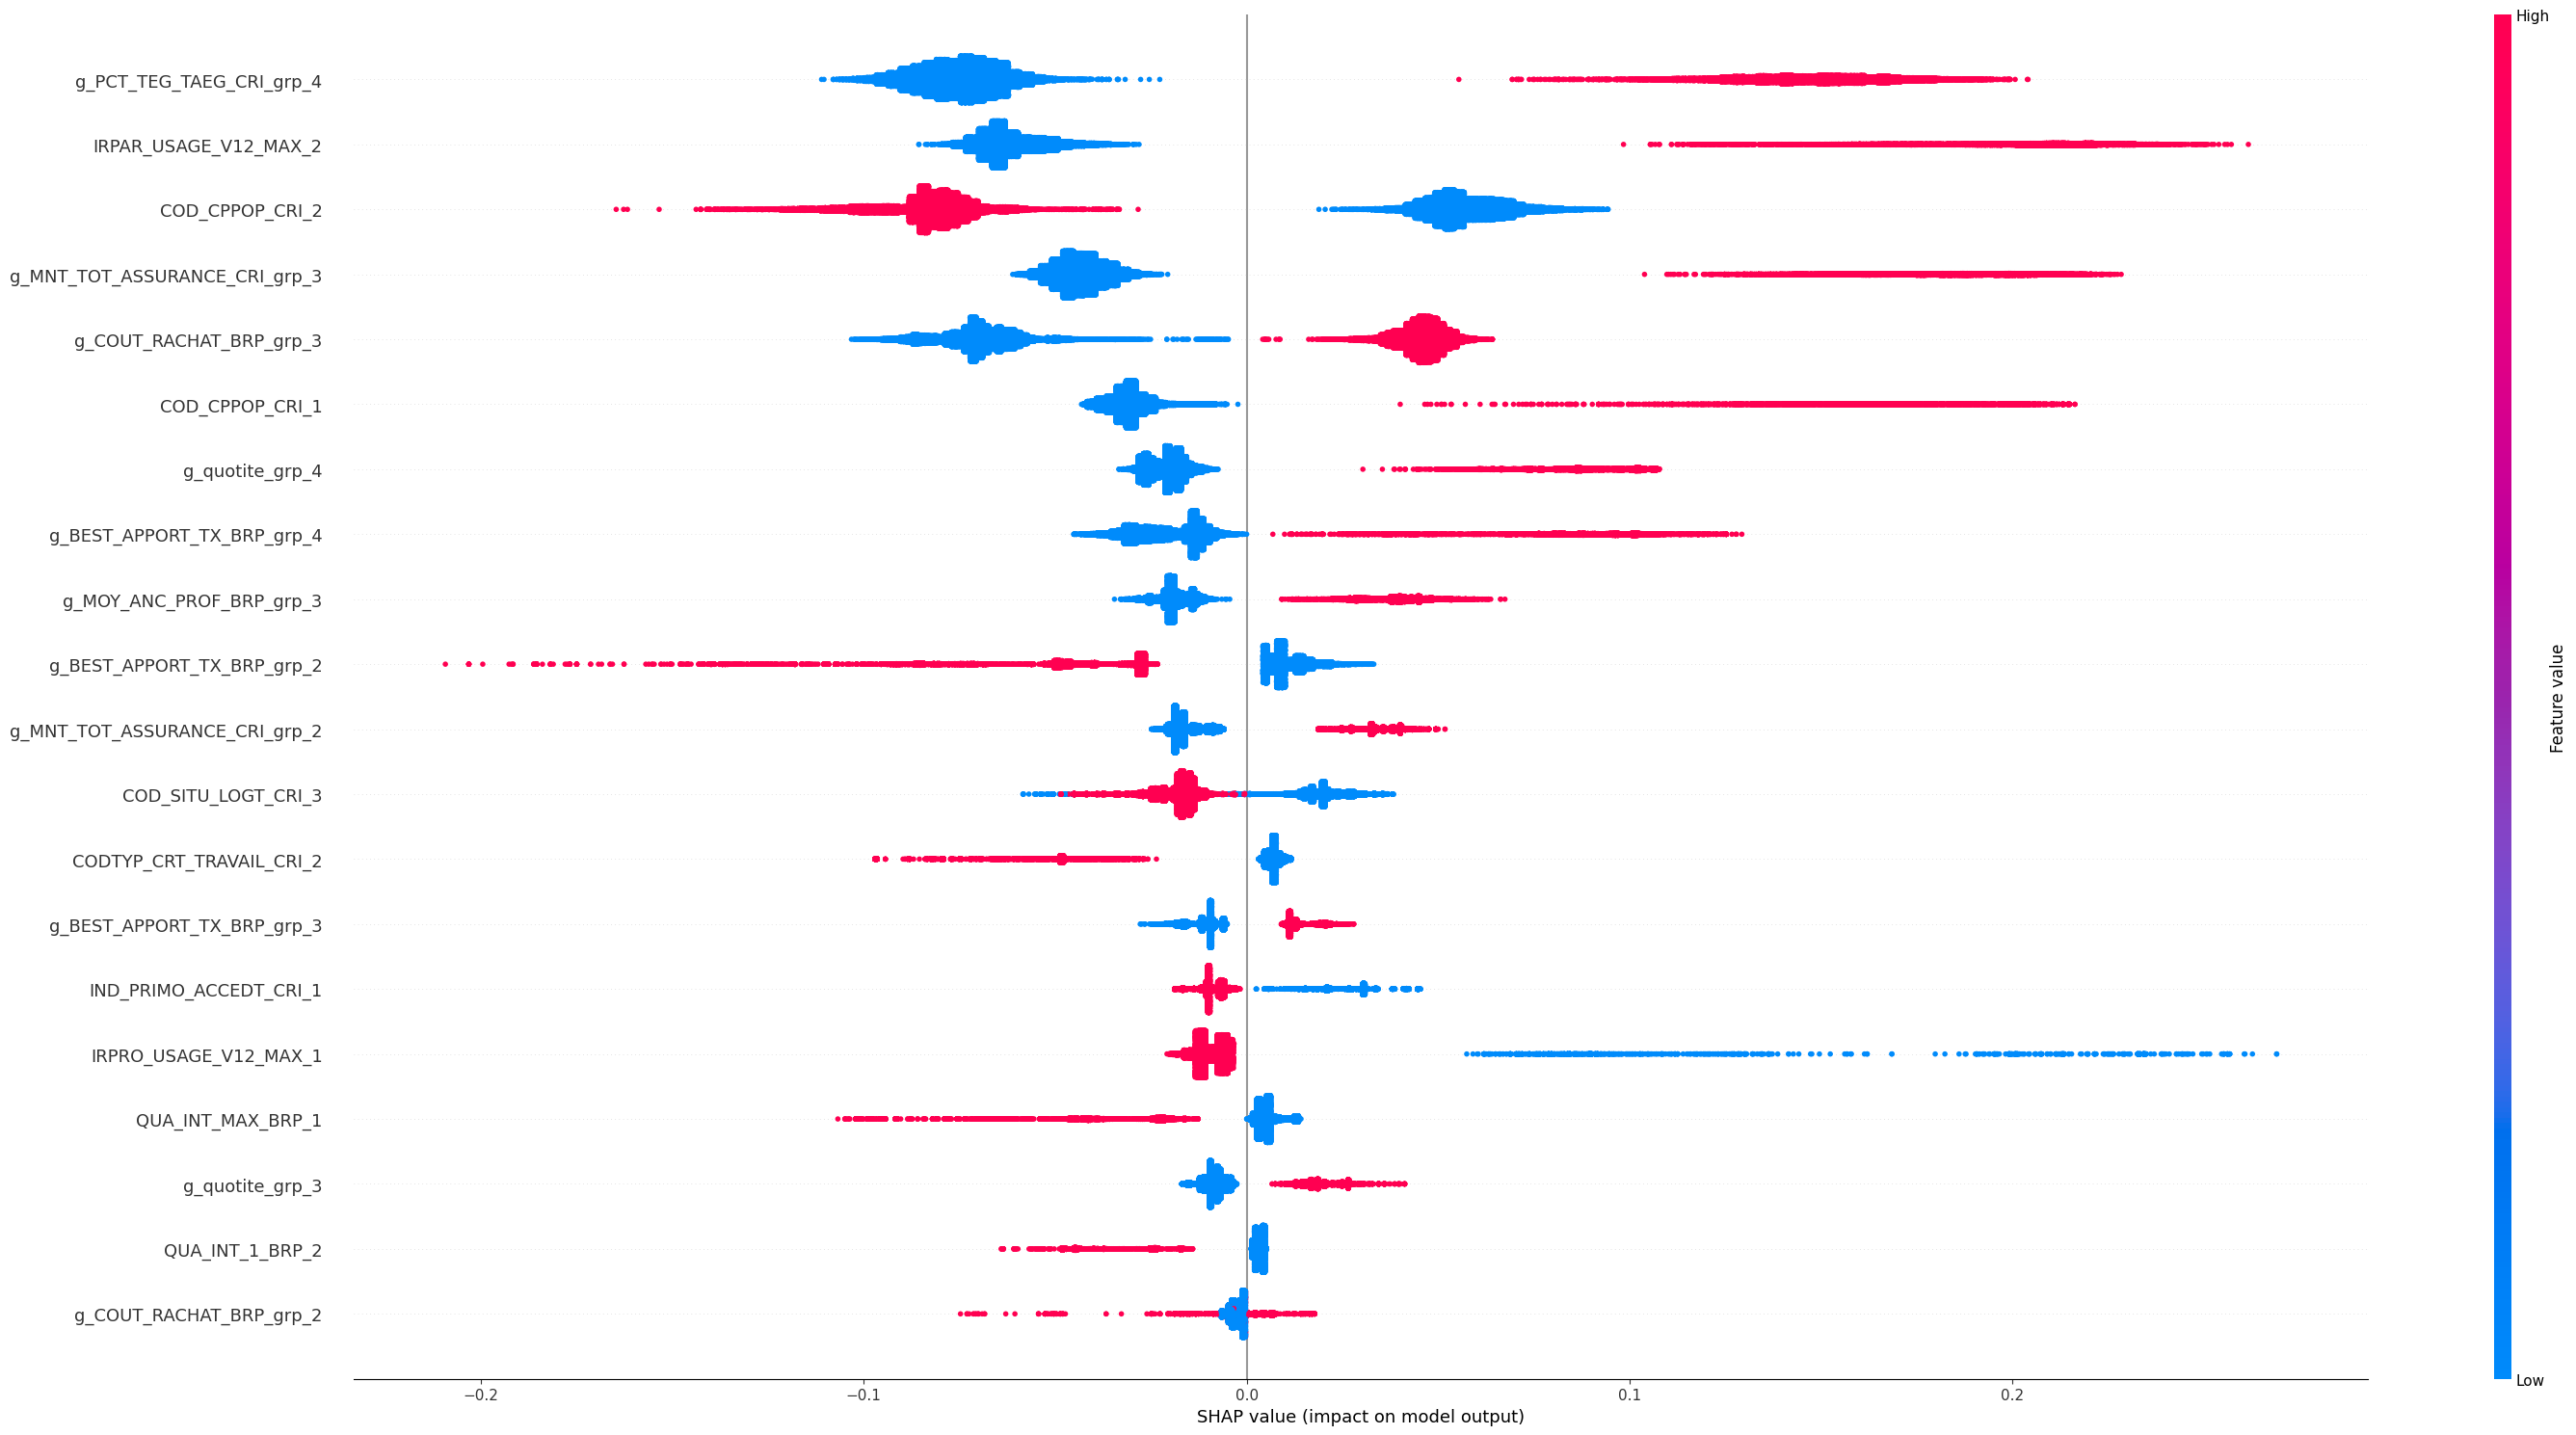

In [ ]:
""" Contributions de toutes les variables"""
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=x_train, # Use training set features
                             feature_names=x_train.columns, #Use column names
                             show=False, #Set to false to output to folder
                             plot_size=(30,15)) # Change plot size


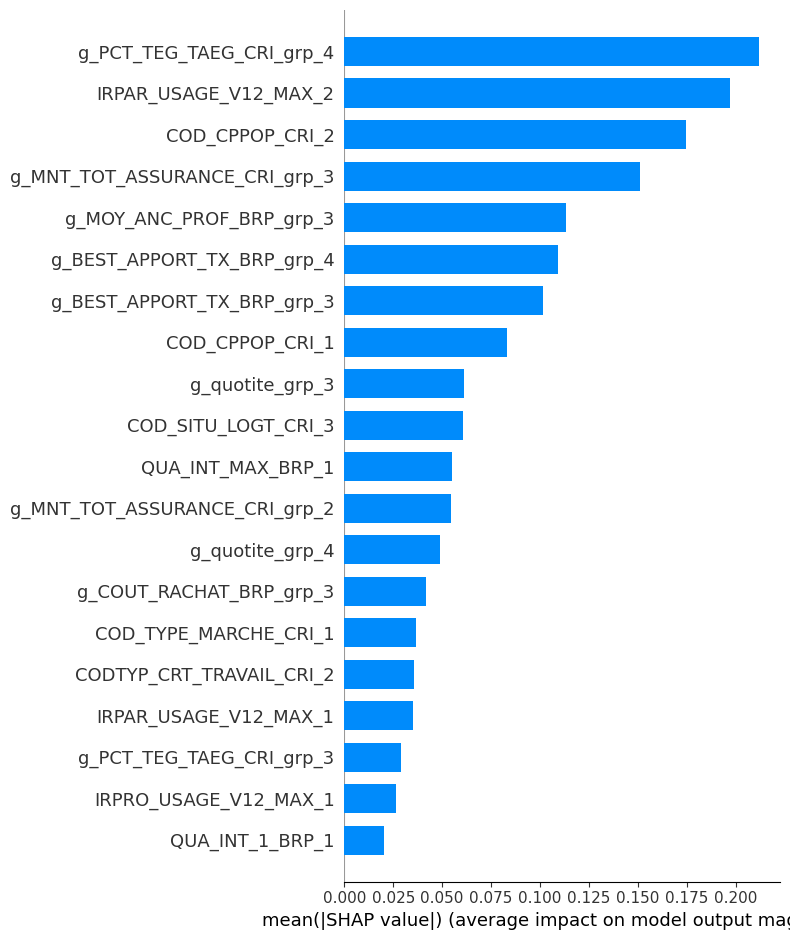

In [ ]:
shap.summary_plot(shap_xgb, x_base_train,plot_type="bar")

Sur le premier graphique, l'importance des variables est exprimée en valeur absolue des valeur de Shap, ce qui permet d'apprécier l'importance dans son ensemble de chacune des valeurs. Parmi les variables qui ont le plus d'importance, que ce soit positivement ou négativement, on trouve le fait d'appartenir à:
- classe 4 de taux de PCT_TEG_TAEG_CRI
-  classe de risque 2 de IRPAR_USAGE_V12_MAX
- classe 2 de COD_CPPOP_CRI
- classe 3 de MTN_TOT_ASSURANCE_CRI

Sur le second graphique, les valeurs de Shap sont présentées par leur ordre d'importance également. De plus, chaque point, soit chaque observation, est présentée dans un 'continuum' de valeur de Shap. Les points rouges sont les valeurs élevées, les bleues les valeurs faibles de cette même variable. Remarque;la cohérence des couleurs n'est pas évidente à interpréter car il n'y a pas de valeurs élevées/faibles pour une modalité. Toutefois, on peut quand même apprécier ce graphique pour nuancer l'importance de la variable explicative: parmi les individus appartenant à une même modalité, on peut voir que la contribution d'une variable, comme  COD_CPPOP_CRI classe 2, peut avoir un effet ambigu sur la prédiction du risque de défaut. En effet, cela peut en grande majorité (concentration sur la gauche) avoir influencer négativement le comportement de non-défaut (c'est-à-dire influencer positivement le comportement de défaut ).

